In [1]:
import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt

### simple data

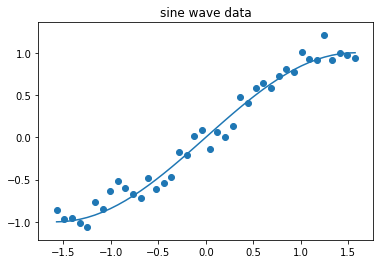

In [2]:
plt.figure()

#true data
N = 40
X = np.linspace(-np.pi/2, np.pi/2, N).reshape(N,1) #40x1
y = np.sin(X)
plt.plot(X,y)

#add noise
y+=0.1*np.random.randn(N,1)

plt.scatter(X,y)
plt.title('sine wave data')
plt.show()

### make feature

In [3]:
n_feature = 2

PHI = np.ones(X.shape[0]).reshape(-1,1) #40x1
for i in range(1, n_feature):
    PHI = np.concatenate((PHI, np.power(X,i)), axis=1)
print('PHI.shape: ', PHI.shape) #40x2
print('PHI[:3]\n', PHI[:3])

#shuffle
idx = np.random.permutation(N)
shuffle_X = X[idx]
shuffle_PHI = PHI[idx]
shuffle_y = y[idx]

PHI.shape:  (40, 2)
PHI[:3]
 [[ 1.         -1.57079633]
 [ 1.         -1.49024267]
 [ 1.         -1.40968901]]


### split train/test dataset

In [4]:
n = N-20

#train data
X_train = shuffle_X[:n]
PHI_train = shuffle_PHI[:n]
y_train = shuffle_y[:n]

print(PHI_train)
print(PHI_train.shape)

#test data
X_test = shuffle_X[:]
PHI_test = shuffle_PHI[:]
y_test = shuffle_y[:]

print(PHI_test)
print(PHI_test.shape)

[[ 1.          0.36249146]
 [ 1.          0.76525975]
 [ 1.         -0.20138414]
 [ 1.          0.84581341]
 [ 1.          1.16802804]
 [ 1.          1.2485817 ]
 [ 1.          1.00692072]
 [ 1.         -0.2819378 ]
 [ 1.          1.32913535]
 [ 1.          0.04027683]
 [ 1.          0.92636706]
 [ 1.          1.57079633]
 [ 1.          0.52359878]
 [ 1.          0.44304512]
 [ 1.         -0.12083049]
 [ 1.          0.12083049]
 [ 1.          1.40968901]
 [ 1.          0.2819378 ]
 [ 1.         -1.16802804]
 [ 1.          0.20138414]]
(20, 2)
[[ 1.          0.36249146]
 [ 1.          0.76525975]
 [ 1.         -0.20138414]
 [ 1.          0.84581341]
 [ 1.          1.16802804]
 [ 1.          1.2485817 ]
 [ 1.          1.00692072]
 [ 1.         -0.2819378 ]
 [ 1.          1.32913535]
 [ 1.          0.04027683]
 [ 1.          0.92636706]
 [ 1.          1.57079633]
 [ 1.          0.52359878]
 [ 1.          0.44304512]
 [ 1.         -0.12083049]
 [ 1.          0.12083049]
 [ 1.          1.40

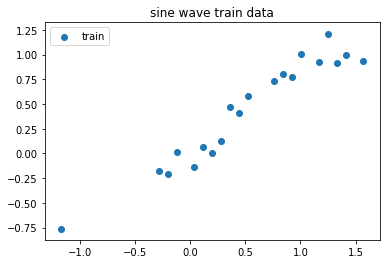

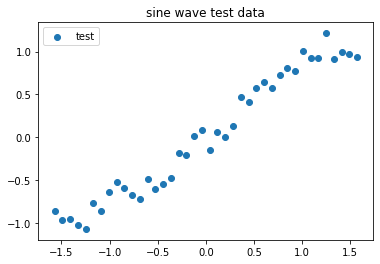

In [6]:
#plot
plt.figure()
plt.scatter(X_train, y_train, label='train')
plt.legend()
plt.title('sine wave train data')
plt.show()

plt.figure()
plt.scatter(X_test, y_test, label='test')
plt.legend()
plt.title('sine wave test data')
plt.show()

### Linear Regression (Formula)

#### method 1 : compute W and b with numpy

In [8]:
#compute W_with PHI_train

W_ = np.linalg.inv(PHI_train.T @ PHI_train) @PHI_train.T @ y_train
print('[b,W] = W_')
print('W_.shape: ', W_.shape)
print('W_ \n', W_)

[b,W] = W_
W_.shape:  (2, 1)
W_ 
 [[0.04327403]
 [0.74560362]]


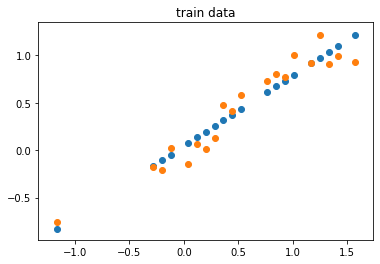

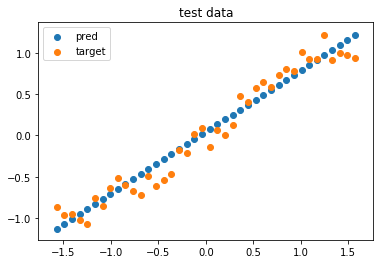

In [17]:
plt.figure()
plt.scatter(X_train, PHI_train @ W_, label='pred')
plt.scatter(X_train, y_train, label='target')
plt.title('train data')
plt.show()

plt.figure()
plt.scatter(X_test, PHI_test @ W_, label='pred')
plt.scatter(X_test, y_test, label='target')
plt.legend()
plt.title('test data')
plt.show()

#### method 2 : compute W and b with sklearn

In [15]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train, y_train)

print('b: ', reg.intercept_)
print('W: ', reg.coef_)

b:  [0.04327403]
W:  [[0.74560362]]


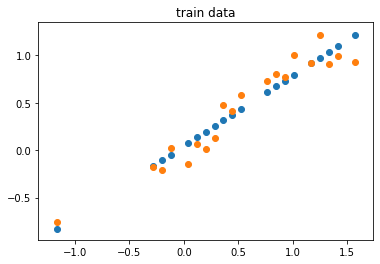

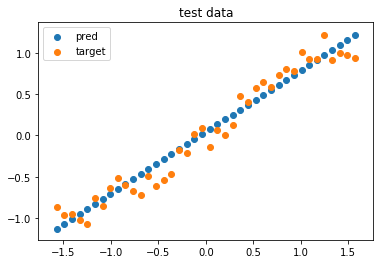

In [18]:
plt.figure()
plt.scatter(X_train, reg.predict(X_train), label='pred')
plt.scatter(X_train, y_train, label='target')
plt.title('train data')
plt.show()

plt.figure()
plt.scatter(X_test, reg.predict(X_test), label='pred')
plt.scatter(X_test, y_test, label='target')
plt.legend()
plt.title('test data')
plt.show()

#### method 3 : compute W and b with tensorflow library

In [21]:
import tensorflow as tf

tf.reset_default_graph() #tensorflow 에서 그래프를 만들 때 초기화시켜주는 것.
tf_PHI = tf.placeholder(tf.float32, [None, n_feature])
tf_y = tf.placeholder(tf.float32, [None, 1])

#train with PHI_train, so w shape is [n_feature, 1]
w = tf.get_variable('w', [n_feature, 1])
#train without bias. (PHI_train term have 1, have bias already.)
y_pred = tf_PHI @ w

loss = tf.reduce_mean(tf.reduce_sum(tf.pow(tf_y - y_pred, 2), axis=1))
optimizer = tf.train.GradientDescentOptimizer(1e-1).minimize(loss)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    for i in range(100):
        sess.run(optimizer, feed_dict={tf_PHI: PHI_train, tf_y:y_train})
        
    print('[b, W]: ', sess.run(w))
    y_train_pred = sess.run(y_pred, feed_dict={tf_PHI: PHI_train})
    y_test_pred = sess.run(y_pred, feed_dict={tf_PHI:PHI_test})

[b, W]:  [[0.04316496]
 [0.74574465]]


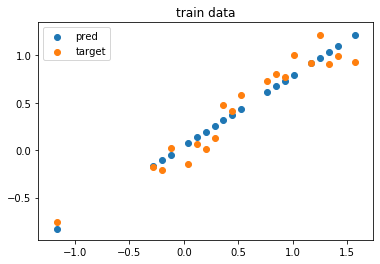

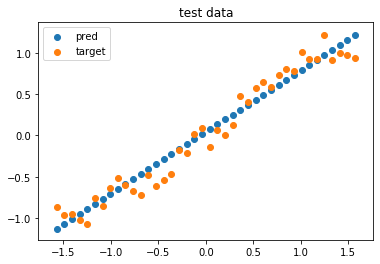

In [22]:
plt.figure()
plt.scatter(X_train, y_train_pred, label='pred')
plt.scatter(X_train, y_train, label='target')
plt.legend()
plt.title('train data')
plt.show()

plt.figure()
plt.scatter(X_test, y_test_pred, label='pred')
plt.scatter(X_test, y_test, label='target')
plt.legend()
plt.title('test data')
plt.show()

In [24]:
import tensorflow as tf
tf.reset_default_graph()
tf_PHI = tf.placeholder(tf.float32, [None, n_feature])
tf_y = tf.placeholder(tf.float32, [None, 1])

y_pred = tf.layers.dense(tf_PHI, 1)

loss = tf.losses.mean_squared_error(tf_y, y_pred)
optimizer = tf.train.GradientDescentOptimizer(1e-1).minimize(loss)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    for i in range(100):
        sess.run(optimizer, feed_dict={tf_PHI: PHI_train, tf_y:y_train})
        
    y_train_pred = sess.run(y_pred, feed_dict={tf_PHI: PHI_train})
    y_test_pred = sess.run(y_pred, feed_dict={tf_PHI:PHI_test})

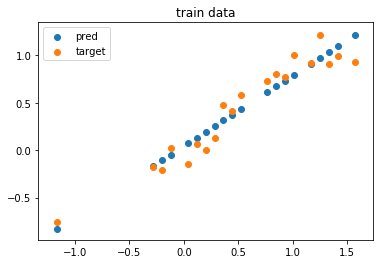

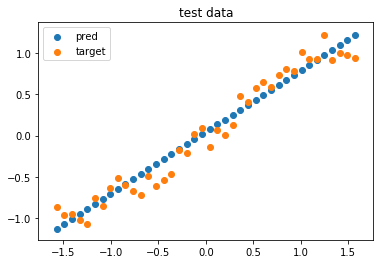

In [25]:
plt.figure()
plt.scatter(X_train, y_train_pred, label='pred')
plt.scatter(X_train, y_train, label='target')
plt.legend()
plt.title('train data')
plt.show()

plt.figure()
plt.scatter(X_test, y_test_pred, label='pred')
plt.scatter(X_test, y_test, label='target')
plt.legend()
plt.title('test data')
plt.show()

### Least Square Regression - multi layer case (for sine wave data)

In [26]:
import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt

In [6]:
#true data
N = 100
X = np.linspace(-np.pi, np.pi, N).reshape(N, 1)
real_y = np.sin(X)

#add noise
y = real_y + 0.1*np.random.randn(N, 1)

#shuffle
idx = np.random.permutation(N)
X_ = X[idx]
y_ = y[idx]

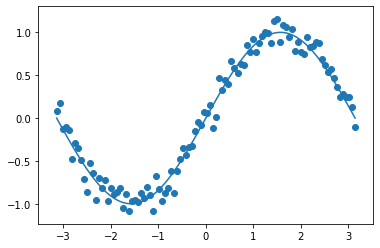

In [7]:
#show
plt.figure()
plt.plot(X, real_y)
plt.scatter(X, y)
plt.show()

### split train / test dataset

In [8]:
n = N-20

X_train = X_[:n]
y_train = y_[:n]
X_test = X_[n:]
y_test = y_[n:]

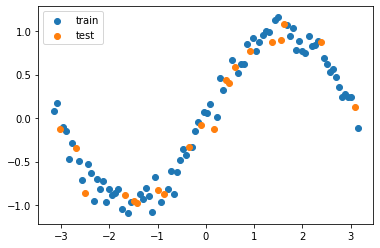

In [9]:
plt.figure()
plt.scatter(X_train, y_train, label='train')
plt.scatter(X_test, y_test, label='test')
plt.legend()
plt.show()

### multi layer linear regression
#### Hyper parameter setting

In [10]:
learning_rate = 1e-1
training_epochs = 1000

In [3]:
#placeholder
tf_X = tf.placeholder(tf.float32, [None, 1])
tf_y = tf.placeholder(tf.float32, [None, 1])

#variables
w1 = tf.get_variable('w1', [1, 1])
b1 = tf.get_variable('b1', [1, 1])
w2 = tf.get_variable('w2', [1, 1])
b2 = tf.get_variable('b2', [1, 1])

#model
output1 = tf_X @ w1+b1
hidden1 = tf.nn.sigmoid(output1)
y_pred = hidden1 @ w2+b2

#loss and optimizer
loss = tf.reduce_mean(tf.reduce_sum(tf.pow(tf_y - y_pred, 2), axis=1))
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)

W0820 16:03:34.857851 140263104513792 deprecation.py:506] From /home/pirl/anaconda3/envs/tensorflow/lib/python3.7/site-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0820 16:03:34.925355 140263104513792 deprecation.py:323] From /home/pirl/anaconda3/envs/tensorflow/lib/python3.7/site-packages/tensorflow/python/ops/math_grad.py:1205: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [11]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    for i in range(training_epochs):
        sess.run(optimizer, feed_dict={tf_X:X_train, tf_y:y_train})
        
    y_train_pred = sess.run(y_pred, feed_dict={tf_X:X_train})
    y_whole_pred = sess.run(y_pred, feed_dict={tf_X:X_})

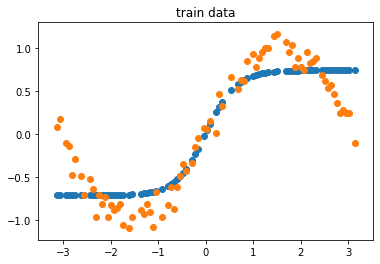

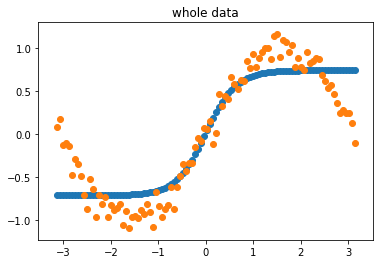

In [13]:
plt.figure()
plt.scatter(X_train, y_train_pred, label='pred')
plt.scatter(X_train, y_train, label='target')
plt.title('train data')
plt.show()

plt.figure()
plt.scatter(X_, y_whole_pred, label='pred')
plt.scatter(X_, y_, label='target')
plt.title('whole data')
plt.show()

### make model with tf.layers.dense

In [17]:
tf.reset_default_graph()

#placeholder
tf_X = tf.placeholder(tf.float32, [None, 1])
tf_y = tf.placeholder(tf.float32, [None, 1])

#model
hidden1 = tf.layers.dense(tf_X, 1, activation=tf.nn.sigmoid)
y_pred = tf.layers.dense(hidden1, 1)

#loss and optimizer
loss = tf.losses.mean_squared_error(tf_y, y_pred)
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
#    losses = []
    for i in range(training_epochs):
#        _, I = sess.run([optimizer, loss], feed_dict={tf_X:X_train, tf_y:y_train})
        sess.run(optimizer, feed_dict={tf_X:X_train, tf_y:y_train})
#        losses.append(I)
    y_train_pred = sess.run(y_pred, feed_dict={tf_X: X_train})
    y_whole_pred = sess.run(y_pred, feed_dict={tf_X:X_})

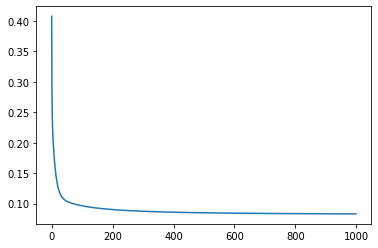

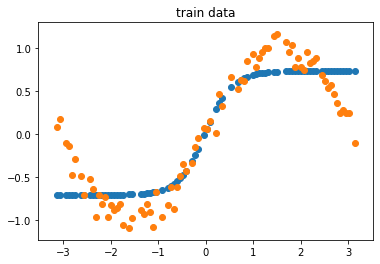

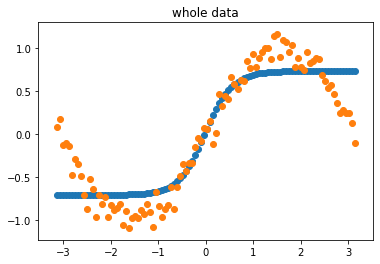

In [18]:
#plot loss
plt.figure()
plt.plot(losses)
plt.show()

plt.figure()
plt.scatter(X_train, y_train_pred, label='pred')
plt.scatter(X_train, y_train, label='target')
plt.title('train data')
plt.show()

plt.figure()
plt.scatter(X_, y_whole_pred, label='pred')
plt.scatter(X_, y_, label='target')
plt.title('whole data')
plt.show()

### change hidden layer's ,,,

In [20]:
tf.reset_default_graph()

#placeholder
tf_X = tf.placeholder(tf.float32, [None, 1])
tf_y = tf.placeholder(tf.float32, [None, 1])

#model
hidden1 = tf.layers.dense(tf_X, 10, activation=tf.nn.sigmoid)
y_pred = tf.layers.dense(hidden1, 1)

#loss and optimizer
loss = tf.losses.mean_squared_error(tf_y, y_pred)
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    losses = []
    for i in range(training_epochs):
        _, I = sess.run([optimizer, loss], feed_dict={tf_X:X_train, tf_y:y_train})
        losses.append(I)
        
    y_train_pred = sess.run(y_pred, feed_dict={tf_X: X_train})
    y_whole_pred = sess.run(y_pred, feed_dict={tf_X:X_})

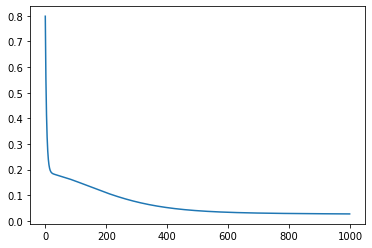

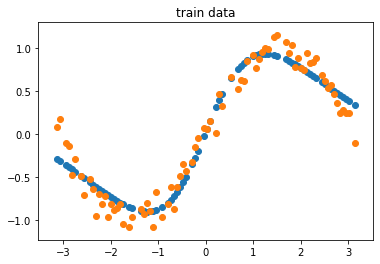

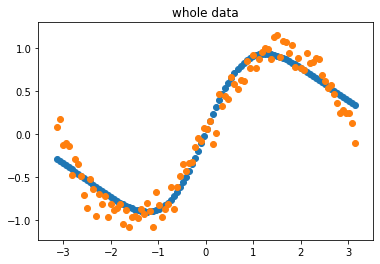

In [21]:
#plot loss
plt.figure()
plt.plot(losses)
plt.show()

plt.figure()
plt.scatter(X_train, y_train_pred, label='pred')
plt.scatter(X_train, y_train, label='target')
plt.title('train data')
plt.show()

plt.figure()
plt.scatter(X_, y_whole_pred, label='pred')
plt.scatter(X_, y_, label='target')
plt.title('whole data')
plt.show()
plt.scatter(X_, y_whole_pred, label='pred')
plt.scatter(X_, y_, label='target')
plt.title('whole data')
plt.show()

### Change activation function from sigmoid to tanh

In [22]:
tf.reset_default_graph()

#placeholder
tf_X = tf.placeholder(tf.float32, [None, 1])
tf_y = tf.placeholder(tf.float32, [None, 1])

#model
hidden1 = tf.layers.dense(tf_X, 10, activation=tf.nn.tanh)
y_pred = tf.layers.dense(hidden1, 1)

#loss and optimizer
loss = tf.losses.mean_squared_error(tf_y, y_pred)
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    losses = []
    for i in range(training_epochs):
        _, I = sess.run([optimizer, loss], feed_dict={tf_X:X_train, tf_y:y_train})
        losses.append(I)
        
    y_train_pred = sess.run(y_pred, feed_dict={tf_X: X_train})
    y_whole_pred = sess.run(y_pred, feed_dict={tf_X:X_})

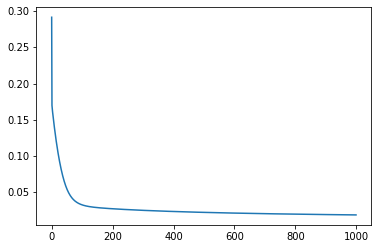

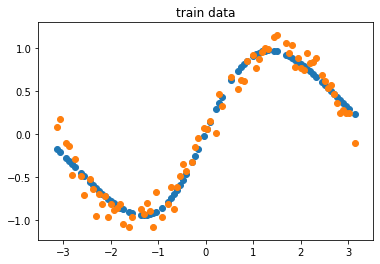

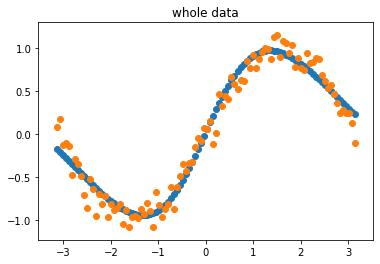

In [24]:
#plot loss
plt.figure()
plt.plot(losses)
plt.show()

plt.figure()
plt.scatter(X_train, y_train_pred, label='pred')
plt.scatter(X_train, y_train, label='target')
plt.title('train data')
plt.show()

plt.figure()
plt.scatter(X_, y_whole_pred, label='pred')
plt.scatter(X_, y_, label='target')
plt.title('whole data')
plt.show()

#빨리 모델이 학습됨을 볼 수 있다. 바로 아래 그래프 !

### 요약

In [28]:
############## hyper parameter setting ###############
learning_rate = 1e-1
training_epochs = 1000

h = 10 ###number of hidden layer nodes
act = tf.nn.tanh ###activation function
######################################################
tf.reset_default_graph()

tf_X = tf.placeholder(tf.float32, [None, 1])
tf_y = tf.placeholder(tf.float32, [None, 1])

hidden1 = tf.layers.dense(tf_X, h, activation=act)
y_pred = tf.layers.dense(hidden1, 1)

loss = tf.losses.mean_squared_error(tf_y, y_pred)
optimizer = tf.train.GradientDescentOptimizer(1e-1).minimize(loss)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    losses =[] ###init loss
    for i in range(1000):
        ###get loss
        _, I = sess.run([optimizer, loss], feed_dict={tf_X:X_train, tf_y:y_train})
        losses.append(I) ###save loss
    y_train_pred = sess.run(y_pred, feed_dict={tf_X:X_train})
    y_whole_pred = sess.run(y_pred, feed_dict={tf_X:X_})